In [9]:
import torch
import torch.nn as nn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

from einops import rearrange, repeat, reduce

from darts.datasets import AirPassengersDataset

In [11]:
from darts.datasets import AusBeerDataset

# Dataset

In [12]:
data = AusBeerDataset().load()
time_series = data.values()
time_series.shape

(211, 1)

In [13]:
data.head(3)

<TimeSeries (DataArray) (date: 3, component: 1, sample: 1)> Size: 24B
array([[[284.]],

       [[213.]],

       [[227.]]])
Coordinates:
  * date       (date) datetime64[ns] 24B 1956-01-01 1956-04-01 1956-07-01
  * component  (component) object 8B 'Y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [14]:
data.components
#data.columns

Index(['Y'], dtype='object', name='component')

In [15]:
print(data.is_univariate)
print(data.is_stochastic)
print(data.is_deterministic)
print(data.is_probabilistic)

True
False
True
False


In [16]:
data.pd_dataframe()

component,Y
date,
1956-01-01,284.0
1956-04-01,213.0
1956-07-01,227.0
1956-10-01,308.0
1957-01-01,262.0
...,...
2007-07-01,394.0
2007-10-01,473.0
2008-01-01,420.0


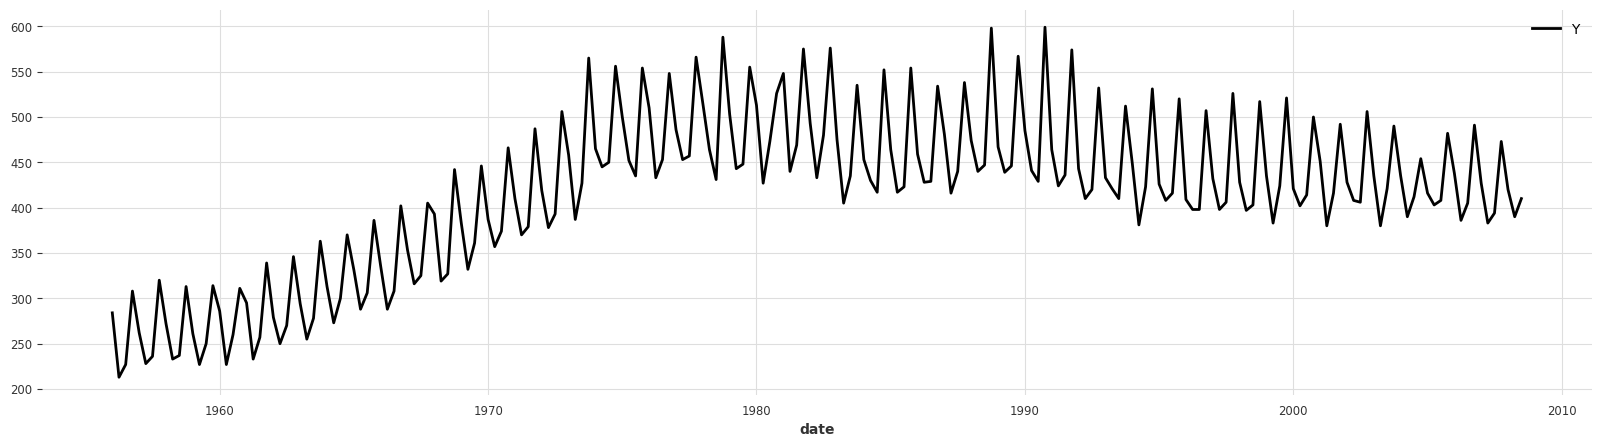

In [17]:
plt.figure(figsize=(20,5))
data.plot()
plt.show()

(168, 1)
(43, 1)


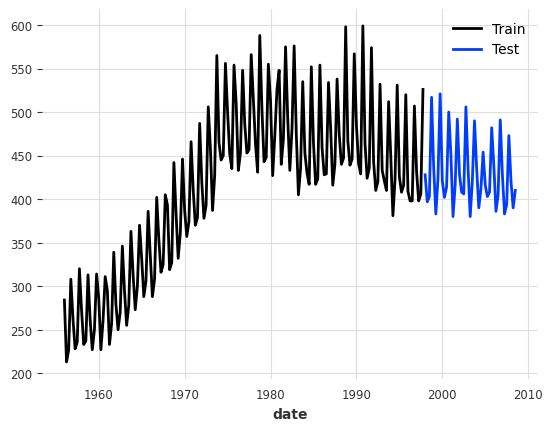

In [21]:
train, test = data.split_before(0.80)
train.plot(label="Train")
test.plot(label="Test")
print(train.values().shape)
print(test.values().shape)

# AutoARIMA

In [22]:
from darts.models.forecasting.auto_arima import AutoARIMA

/home/aditya/Documents/Time-forecasting-ESN/.venv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [25]:
model = AutoARIMA()
model.fit(train)
pred = model.predict(n=43)

<Axes: xlabel='date'>

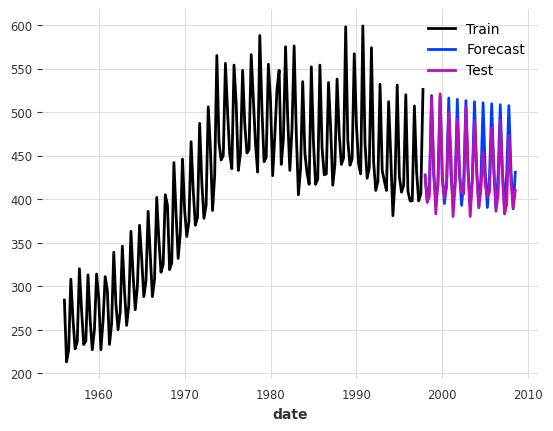

In [26]:
train.plot(label='Train')
pred.plot(label='Forecast')
test.plot(label='Test')

In [27]:
print(f"RMSE: {np.sqrt(mean_squared_error(test.values(), pred.values()))}")
print(f" MAE: {mean_absolute_error(test.values(), pred.values())}")

RMSE: 16.829606961380524
 MAE: 12.666953145838876


# ARIMA

In [29]:
from darts.models.forecasting.arima import ARIMA

In [39]:
model = ARIMA(p=3,d=2,q=5)
model.fit(train)
pred = model.predict(n=43)

/home/aditya/Documents/Time-forecasting-ESN/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/aditya/Documents/Time-forecasting-ESN/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

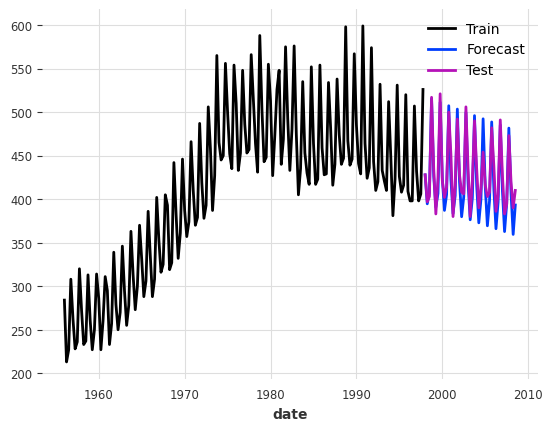

In [40]:
train.plot(label='Train')
pred.plot(label='Forecast')
test.plot(label='Test')

In [41]:
print(f"RMSE: {np.sqrt(mean_squared_error(test.values(), pred.values()))}")
print(f" MAE: {mean_absolute_error(test.values(), pred.values())}")

RMSE: 15.69170661317708
 MAE: 12.593302613343239


# SARIMA

In [44]:
model = ARIMA(p=2,d=1,q=2, seasonal_order=(2,1,1,12))
model.fit(train)
pred = model.predict(n=43)

<Axes: xlabel='date'>

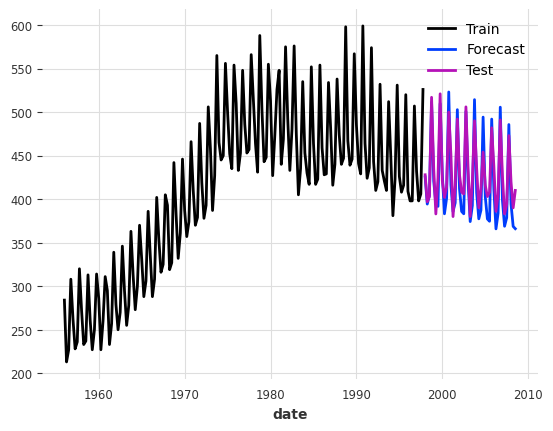

In [45]:
train.plot(label='Train')
pred.plot(label='Forecast')
test.plot(label='Test')

In [46]:
print(f"RMSE: {np.sqrt(mean_squared_error(test.values(), pred.values()))}")
print(f" MAE: {mean_absolute_error(test.values(), pred.values())}")

RMSE: 20.899438246526525
 MAE: 18.280459216763404


In [47]:
from darts.models import NBEATSModel

In [49]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=123)
model.fit(train)
pred = model.predict(n=43, series=train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

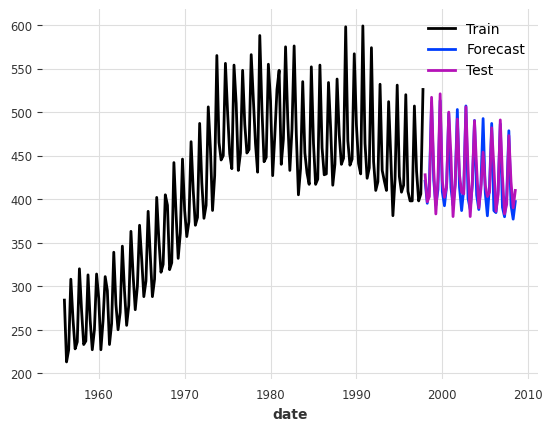

In [50]:
train.plot(label='Train')
pred.plot(label='Forecast')
test.plot(label='Test')

In [51]:
print(f"RMSE: {np.sqrt(mean_squared_error(test.values(), pred.values()))}")
print(f" MAE: {mean_absolute_error(test.values(), pred.values())}")

RMSE: 17.392083223732023
 MAE: 12.59468563355389
